In [1]:
import numpy as np
import pandas as pd

- *Name :* *Smruti Sonekar*
- *Branch :* *TY CSE DS*
- *UID :* *2021700064*
- *EXP NO :* *4*
- *Topic :* *Implement Logistic Regression*

In [2]:
import numpy as np
import pandas as pd

**It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. Logistic Regression is also called Logit Regression. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.**
- **Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.**
- **If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation :: z = β0 + β1x1**
- **This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.**
- **The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.Mathematically, it can be expressed as follows:-**

- *p ≥ 0.5 => class = 1*

- *p < 0.5 => class = 0*

- *Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0.*

**The Logistic Regression model requires several key assumptions. These are as follows:-**

- Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

- It requires the observations to be independent of each other. So, the observations should not come from repeated -measurements.
- Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.
- Logistic Regression model assumes linearity of independent variables and log odds.
- The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to - achieve the high accuracy.

**TYPES OF LOGISTIC REGRESSION**


1. **Binary Logistic Regression**: In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.

2. **Multinomial Logistic Regression**¶:In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.

3. **Ordinal Logistic Regression**:In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.

In [3]:
df1=pd.DataFrame(pd.read_csv("./files/diabetes2.csv"))

*Problem Statement:*
- **Diabetes is a chronic disease that occurs when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. It is a significant health issue globally, affecting millions of people. Early detection and management of diabetes are crucial for preventing complications and improving health outcomes.**

- **You are provided with a dataset containing various health metrics and indicators for a group of individuals, including information about whether each person has diabetes or not. Your task is to build a predictive model that can accurately classify individuals as either diabetic or non-diabetic based on their health attributes.**

In [4]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnancies: Number of times pregnant.
- Glucose: Plasma glucose concentration in a 2-hour oral glucose tolerance test.
- BloodPressure: Diastolic blood pressure (mm Hg).
- SkinThickness: Triceps skin fold thickness (mm).
- Insulin: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index (weight in kg / (height in m)^2).
- DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family - history).
- Age: Age in years.
- **The target variable is:**
- Outcome: 1 if the person has diabetes, 0 if not.

In [5]:
df1.duplicated().sum()

0

In [6]:
df1.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [7]:
df1.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Since *Pregnancies , SkinThickness, DiabetesPedigreeFunction* mean is very less which can lead to imbalanced dataset ,so will not consider these columns in logistic regression

**Data set does not have any missing values or duplicate values , so we can move forward with logistic regression**

In [8]:
df1.shape

(768, 9)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Outcome'>

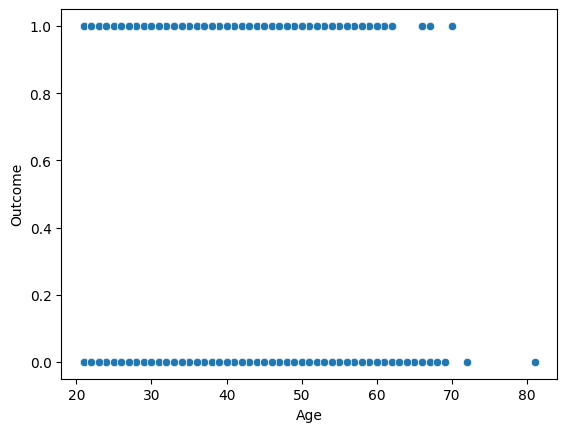

In [10]:
sns.scatterplot(x="Age",y="Outcome",data=df1)

<Axes: xlabel='Glucose', ylabel='Outcome'>

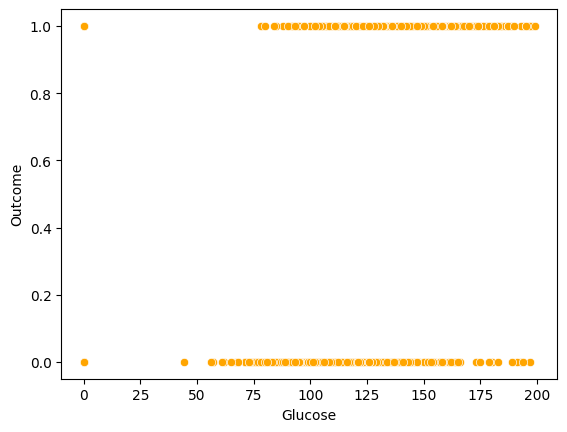

In [11]:
sns.scatterplot(x="Glucose",y="Outcome",data=df1,color="orange")

<Axes: xlabel='Insulin', ylabel='Outcome'>

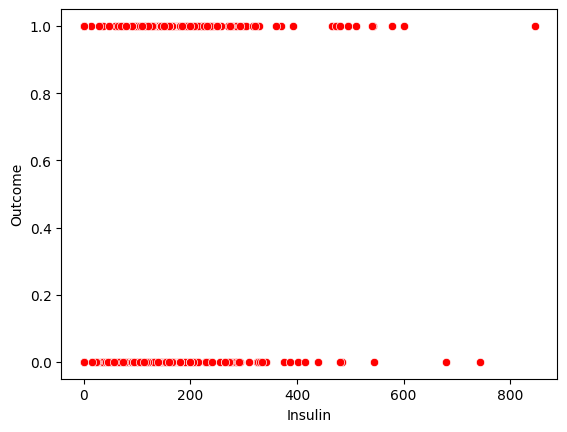

In [12]:
sns.scatterplot(x="Insulin",y="Outcome",data=df1,color="red")

<Axes: xlabel='BloodPressure', ylabel='Outcome'>

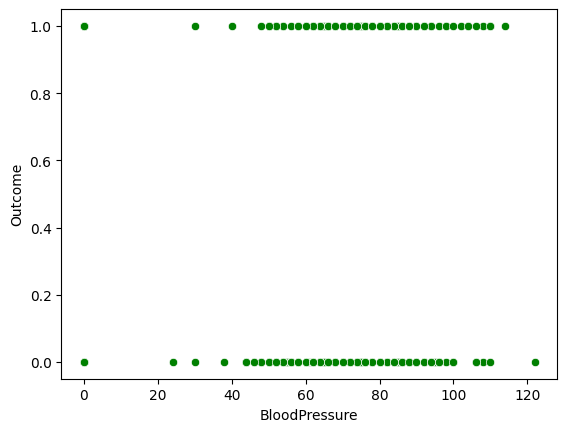

In [13]:
sns.scatterplot(x="BloodPressure",y="Outcome",data=df1,color="green")

In [14]:
from sklearn.model_selection  import train_test_split

In [15]:
x=df1[['Age','BloodPressure','Insulin','Glucose','BMI']]
y=df1['Outcome']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [17]:
x_train.shape,x_test.shape

((537, 5), (231, 5))

In [18]:
y_train.shape,y_test.shape

((537,), (231,))

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [21]:
x_test

,Age,BloodPressure,Insulin,Glucose,BMI
668,43,58,190,98,34.0
324,21,75,0,112,35.7
624,21,64,0,108,30.8
690,34,80,0,107,24.6
473,50,90,0,136,29.9
...,...,...,...,...,...
619,24,0,0,119,32.4
198,26,64,99,109,34.8
538,23,80,210,127,36.3
329,37,70,68,105,30.8


In [22]:
model.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
y_pred=model.predict(x_test)

In [25]:
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

**Classification Report**
1. Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.
2. **Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class. precision can be defined as the ratio of TP to (TP + FP).
3. **Recall** can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.Recall identifies the proportion of correctly predicted actual positives.
4. **f1-score** is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. 
5. **Support is the actual number of occurrences of the class in our dataset.**

In [26]:
print("\n Classification report: \n",classification_rep)


 Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



**Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-**
 
- **True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation  actually belongs to that class.

- **True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the - observation actually does not belong to that class.
 
- **False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation - actually does not belong to that class. This type of error is called Type I error.
 
- **False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error**

In [27]:
print("\n Confusion Matrix: \n",conf_matrix)


 Confusion Matrix: 
 [[123  28]
 [ 34  46]]


In [28]:
y_pred_prob = model.predict_proba(x_test)[0:10]

y_pred_prob

array([[0.73830535, 0.26169465],
       [0.78771205, 0.21228795],
       [0.86727485, 0.13272515],
       [0.89914342, 0.10085658],
       [0.48685496, 0.51314504],
       [0.51604718, 0.48395282],
       [0.98557203, 0.01442797],
       [0.37925263, 0.62074737],
       [0.41498106, 0.58501894],
       [0.15878753, 0.84121247]])

In each row, the numbers sum to 1.
There are 2 columns which correspond to 2 classes - 0 and 1.

Class 0 - predicted probability that Patient does not Diabetes.

Class 1 - predicted probability that Patient is Diabetes.

Importance of predicted probabilities

We can rank the observations by probability of patient is Diabetic or not.

predict_proba process: Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 1 - probability of diabetes is predicted if probability > 0.5.

Class 0 - probability of no diabetes is predicted if probability < 0.5.

In [29]:
model.predict_proba(x_test)[0:10,1]

array([0.26169465, 0.21228795, 0.13272515, 0.10085658, 0.51314504,
       0.48395282, 0.01442797, 0.62074737, 0.58501894, 0.84121247])

In [30]:
model.predict_proba(x_test)[0:10,0]

array([0.73830535, 0.78771205, 0.86727485, 0.89914342, 0.48685496,
       0.51604718, 0.98557203, 0.37925263, 0.41498106, 0.15878753])

In [31]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of -Not Diabetic (0)','Prob of -Diabetic(1)'])

y_pred_prob_df

,Prob of -Not Diabetic (0),Prob of -Diabetic(1)
0,0.738305,0.261695
1,0.787712,0.212288
2,0.867275,0.132725
3,0.899143,0.100857
4,0.486855,0.513145
5,0.516047,0.483953
6,0.985572,0.014428
7,0.379253,0.620747
8,0.414981,0.585019
9,0.158788,0.841212


Text(0, 0.5, 'Frequency')

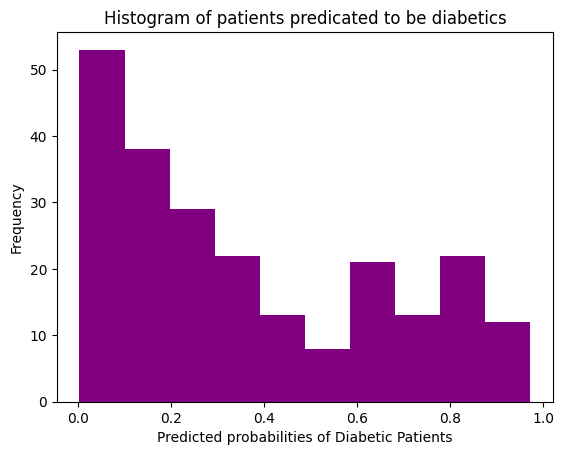

In [32]:
y_pred1 = model.predict_proba(x_test)[:, 1]

plt.hist(y_pred1,bins=10,color="purple")
plt.title("Histogram of patients predicated to be diabetics")
# set the title
plt.xlabel('Predicted probabilities of Diabetic Patients')
plt.ylabel('Frequency')

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the LOGISTIC REGRESSION evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7316017316017316
Precision: 0.7273986700738294
Recall: 0.7316017316017316
F1 Score: 0.7289874627536964
Confusion Matrix:
 [[123  28]
 [ 34  46]]
